<a href="https://colab.research.google.com/github/pmpatel-udallas/BCCE2024/blob/main/Engineering%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Title

In [40]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update({'font.size': 16}) # Change the default font size to 16 pt.

#Import data

In [2]:
!git clone https://github.com/pmpatel-udallas/BCCE2024.git

Cloning into 'BCCE2024'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 65 (delta 26), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (65/65), 6.07 MiB | 3.41 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [18]:
data=pd.read_excel('/content/BCCE2024/Data/Ex_Engineering.xlsx',sheet_name='Main Data')
para_data=pd.read_excel('/content/BCCE2024/Data/Ex_Engineering.xlsx',sheet_name='Parametric Study')

In [13]:
data

,Trial #,Target Mesh Size,Mesh Max,Mesh Min,Cell Count,Time,Iter,Pdif
0,1.0,40.00,4.000,35.000,2433.0,3.5,35.0,1054.090
1,2.0,32.00,35.200,28.800,3613.0,35.6,2000.0,1362.590
2,3.0,25.50,28.050,22.950,9367.0,39.7,2000.0,569.043
3,4.0,20.00,22.000,18.000,20353.0,5.0,154.0,577.877
4,5.0,15.80,17.380,14.220,39023.0,7.8,159.0,527.030
5,6.0,12.60,13.860,11.340,73645.0,11.2,177.0,523.716
6,7.0,10.00,11.000,9.000,122505.0,27.3,273.0,518.985
7,8.0,8.00,8.800,7.200,240897.0,359.0,2000.0,507.619
8,9.0,6.30,6.930,5.670,378769.0,523.0,2000.0,508.029
9,10.0,5.00,5.500,4.500,623734.0,178.0,388.0,513.609


In [14]:
# Drop rows (axis = 0) or columns (axis = 1) if any cell in that row/column contains a NaN value
# Using the how='all' option will work if there all the cells in that row/column contains NaN values

data_1=data.dropna(how='any',axis=0)
data_1

,Trial #,Target Mesh Size,Mesh Max,Mesh Min,Cell Count,Time,Iter,Pdif
0,1.0,40.0,4.00,35.00,2433.0,3.5,35.0,1054.090
1,2.0,32.0,35.20,28.80,3613.0,35.6,2000.0,1362.590
2,3.0,25.5,28.05,22.95,9367.0,39.7,2000.0,569.043
3,4.0,20.0,22.00,18.00,20353.0,5.0,154.0,577.877
4,5.0,15.8,17.38,14.22,39023.0,7.8,159.0,527.030
5,6.0,12.6,13.86,11.34,73645.0,11.2,177.0,523.716
6,7.0,10.0,11.00,9.00,122505.0,27.3,273.0,518.985
7,8.0,8.0,8.80,7.20,240897.0,359.0,2000.0,507.619
8,9.0,6.3,6.93,5.67,378769.0,523.0,2000.0,508.029
9,10.0,5.0,5.50,4.50,623734.0,178.0,388.0,513.609


In [15]:
#Drop unwanted trials by rows
data_main=data_1.drop(index=[1,2,7,8])
data_main

,Trial #,Target Mesh Size,Mesh Max,Mesh Min,Cell Count,Time,Iter,Pdif
0,1.0,40.0,4.00,35.00,2433.0,3.5,35.0,1054.090
3,4.0,20.0,22.00,18.00,20353.0,5.0,154.0,577.877
4,5.0,15.8,17.38,14.22,39023.0,7.8,159.0,527.030
5,6.0,12.6,13.86,11.34,73645.0,11.2,177.0,523.716
6,7.0,10.0,11.00,9.00,122505.0,27.3,273.0,518.985
9,10.0,5.0,5.50,4.50,623734.0,178.0,388.0,513.609
10,11.0,4.0,4.40,3.60,1572107.0,616.3,531.0,505.888
11,12.0,3.5,3.85,3.15,2274369.0,1048.5,609.0,506.689


In [19]:
para_data=para_data.dropna(how='all',axis=1)
para_data

,Unnamed: 0,Design Point 1,Design Point 2,Design Point 3,Design Point 4,Design Point 5,Design Point 6,Design Point 7,Design Point 8,Design Point 9,Design Point 10,Design Point 11,Design Point 12
0,Number of cells per X (Basic Mesh) [ ],100.000000,126.000000,159.000000,200.000000,252.000000,317.000000,400.000000,504.00000,635.000000,800.000000,1008.000000,1.270000e+03
1,Number of cells per Y (Basic Mesh) [ ],28.000000,35.000000,44.000000,56.000000,71.000000,89.000000,112.000000,141.00000,178.000000,224.000000,282.000000,3.560000e+02
2,Number of cells per Z (Basic Mesh) [ ],3.000000,4.000000,5.000000,6.000000,8.000000,10.000000,12.000000,15.00000,19.000000,24.000000,30.000000,3.800000e+01
3,CPU Time,2.000000,3.000000,3.000000,6.000000,10.000000,21.000000,40.000000,96.00000,224.000000,561.000000,1442.000000,2.237000e+03
4,Cells,1468.000000,2500.000000,4886.000000,9740.000000,18536.000000,34810.000000,65895.000000,127762.00000,247958.000000,490704.000000,957727.000000,1.888075e+06
5,Total Pdif Goal 1 [Pa],1507.625376,1221.974371,1520.214334,1448.084361,1329.569011,1235.260528,1194.529042,1173.92894,1170.225978,1160.838512,1141.123663,1.132799e+03
6,Static Pdif Goal 1 [Pa],884.595055,600.674719,897.107741,825.414781,707.617478,613.880380,573.395673,552.92038,549.239854,539.909263,520.313860,5.120395e+02
7,Total cells,1468.000000,2500.000000,4886.000000,9740.000000,18536.000000,34810.000000,65895.000000,127762.00000,247958.000000,490704.000000,957727.000000,1.888075e+06


In [26]:
para_data.iloc[7][1:]

Design Point 1        1468.0
Design Point 2        2500.0
Design Point 3        4886.0
Design Point 4        9740.0
Design Point 5       18536.0
Design Point 6       34810.0
Design Point 7       65895.0
Design Point 8      127762.0
Design Point 9      247958.0
Design Point 10     490704.0
Design Point 11     957727.0
Design Point 12    1888075.0
Name: 7, dtype: object

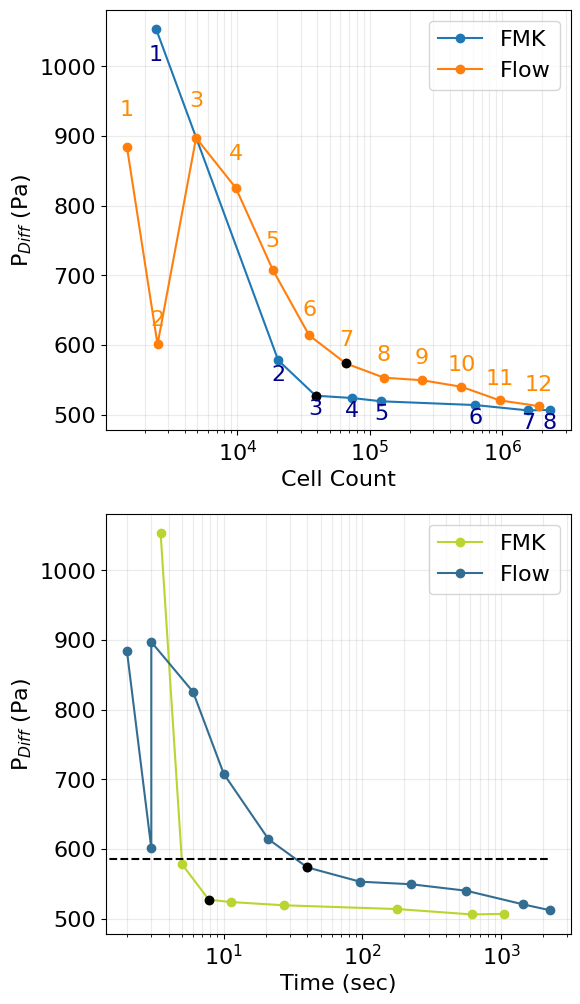

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(6,12))


# Data Main -- Data Table from Main Plots Excel Sheet
# Data -- Data Table from Parametric Study Excel Sheet

# Top Plot
ax1.plot(data_main['Cell Count'],data_main['Pdif'],'o-',label='FMK')
ax1.plot(para_data.iloc[7][1:],para_data.iloc[6][1:],'o-',label='Flow')

# Selecting points to change color (Black, 'k')
ax1.plot(para_data.iloc[7][1:][6],para_data.iloc[6][1:][6],'ko')
ax1.plot(data_main['Cell Count'].iloc[2],data_main['Pdif'].iloc[2],'ko')

# Adding a legend in best location
ax1.legend(loc=0)

# Labelling axes
ax1.set_xlabel('Cell Count')
ax1.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines
ax1.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax1.set_xscale('log',base=10)

#---------------------------------------------------------
# Using custom colors
#---------------------------------------------------------
#BAD532 (GREEN) #98989A (GREY) #336D91 (DARK BLUE) #00AEEF (LIGHT BLUE)


# Bottom Plot
ax2.plot(data_main['Time'],data_main['Pdif'],'o-',label='FMK',color='#BAD532')
ax2.plot(para_data.iloc[3][1:],para_data.iloc[6][1:],'o-',label='Flow',color='#336D91')

# Selecting points to change color (Black, 'k')
ax2.plot(para_data.iloc[3][1:][6],para_data.iloc[6][1:][6],'ko')
ax2.plot(data_main['Time'].iloc[2],data_main['Pdif'].iloc[2],'ko')

# Adding a legend in best location
ax2.legend(loc=0)

# Labelling axes
ax2.set_xlabel('Time (sec)')
ax2.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines
ax2.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax2.set_xscale('log',base=10)

# Horizontal Line that is dashed (threshold)
ax2.plot([0,max(para_data.iloc[3][1:])],[586,586],'k--')

# Data Labels above/below marker
for i in range(12): # Flow
  ax1.text(para_data.iloc[7][1:][i],para_data.iloc[6][1:][i]*1.06,str(i+1),color='darkorange',horizontalalignment='center',verticalalignment='center')
for i in range(8): # FMK
  ax1.text(data_main['Cell Count'].iloc[i],data_main['Pdif'].iloc[i]*0.965,str(i+1),color='darkblue',horizontalalignment='center',verticalalignment='center')

plt.show()

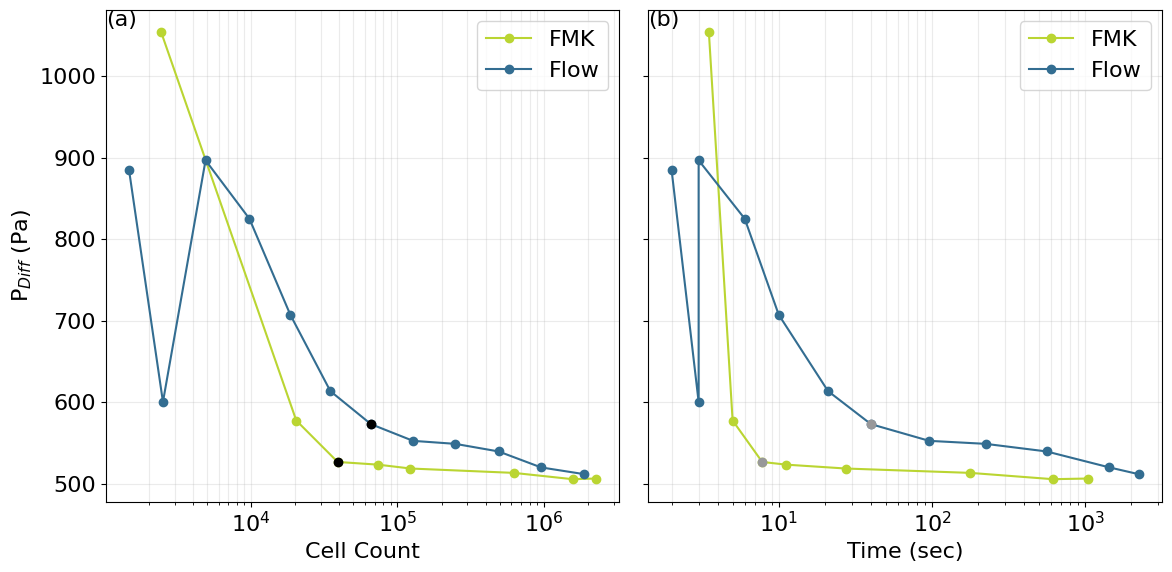

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,6), sharey=True)


# Data Main -- Data Table from Main Plots Excel Sheet
# Para Data -- Data Table from Parametric Study Excel Sheet

# Top Plot
ax1.plot(data_main['Cell Count'],data_main['Pdif'],'o-',label='FMK',color='#BAD532')
ax1.plot(para_data.iloc[7][1:],para_data.iloc[6][1:],'o-',label='Flow',color='#336D91')

# Selecting points to change color (Black, 'k')
ax1.plot(para_data.iloc[7][1:][6],para_data.iloc[6][1:][6],'ko')
ax1.plot(data_main['Cell Count'].iloc[2],data_main['Pdif'].iloc[2],'ko')

# Adding a legend in best location
ax1.legend(loc=0)

# Labelling axes
ax1.set_xlabel('Cell Count')
ax1.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines
ax1.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax1.set_xscale('log',base=10)

#BAD532 (GREEN) #98989A (GREY) #336D91 (DARK BLUE) #00AEEF (LIGHT BLUE)


# Bottom Plot
ax2.plot(data_main['Time'],data_main['Pdif'],'o-',label='FMK',color='#BAD532')
ax2.plot(para_data.iloc[3][1:],para_data.iloc[6][1:],'o-',label='Flow',color='#336D91')

# Selecting points to change color (Black, 'k')
ax2.plot(para_data.iloc[3][1:][6],para_data.iloc[6][1:][6],'o',color='#98989A')
ax2.plot(data_main['Time'].iloc[2],data_main['Pdif'].iloc[2],'o',color='#98989A')

# Adding a legend in best location
ax2.legend(loc=0)

# Labelling axes
ax2.set_xlabel('Time (sec)')

# Specifying grid lines (alpha = transparency keyword -- alpha=1 (opaque), alpha=0 (transparent))
ax2.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax2.set_xscale('log',base=10)

# Grab the default limits
xmin, xmax= ax1.get_xlim()
ymin, ymax= ax1.get_ylim()

xmin2, xmax2= ax2.get_xlim()
ymin2, ymax2= ax2.get_ylim()

# Label the plots
ax1.text(xmin,ymax,'(a)',verticalalignment='top',fontsize=16)
ax2.text(xmin2,ymax2,'(b)',verticalalignment='top',fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('FMKvFlow.png',dpi=150,bbox_inches='tight')